In [ ]:
'''
聚类可视化图：用于展示不同方法降维结果的聚类存在差异，对应论文中聚类分析主图
'''

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
embedding = pd.read_csv('/home/henu/work/result/DR/benchmarker/Zhengmix4eq/SSNMDI_2.csv', index_col=0)

In [18]:
meta  = pd.read_csv('/home/henu/work/data/benchmarker/Zhengmix4eq/cell_metadata.csv', index_col=0)
df = embedding.join(meta['cell_type'])
df.columns = ['dim1','dim2','cell_type']

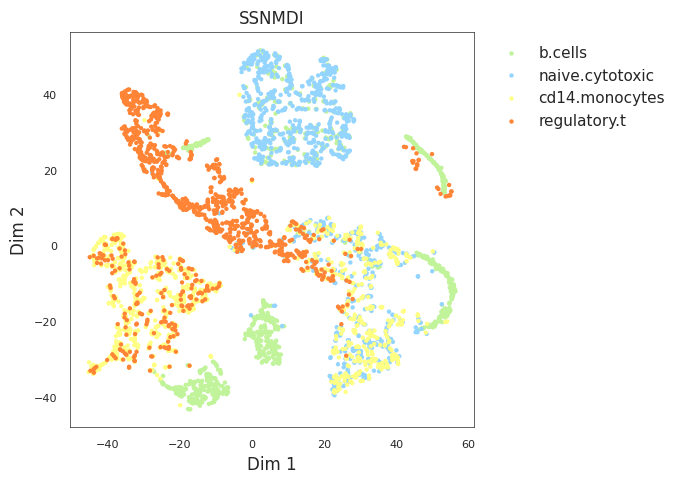

In [20]:
# —— 1) 锁定类别顺序（可避免颜色随数据顺序变化）——
cats = pd.Index(df['cell_type'].astype(str)).dropna().unique()

# —— 2) 手动颜色（可自行调整/增减；不足时会循环使用）——
manual_colors = [
    "#C0F39A", "#94D5FF", "#FFFF84", "#FF8435"
]
palette = {c: manual_colors[i % len(manual_colors)] for i, c in enumerate(cats)}

# —— 3) 绘图：白色背景、无网格、手动点大小 ——
sns.set_theme(style="white")                      # 去掉seaborn默认网格
fig, ax = plt.subplots(figsize=(7, 5), facecolor="white")

for spine in fig.gca().spines.values():
    spine.set_linewidth(0.5)

ax.set_facecolor("white")

sns.scatterplot(
    data=df,
    x='dim1', y='dim2',
    hue='cell_type',
    palette=palette,      # 使用手动颜色映射
    s=10,                 # 点大小（手动设置）
    linewidth=0,          # 无描边
    ax=ax
)

ax.grid(False)            # 不要背景方格线
ax.set_xlabel('Dim 1')
ax.set_ylabel('Dim 2')
ax.set_title('SSNMDI')
ax.tick_params(axis='both', which='major', labelsize=8)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False, title=None)

plt.tight_layout()
plt.savefig('/home/henu/work/other/1/cluster/SSNMDI4.svg',
            dpi=300, bbox_inches='tight', facecolor="white")
plt.show()